# What Makes a Bike so Popular?

## Jayden Tran | z5360741


## Intro


Ok, so basically, I have a curated dataset that has a ton of different bikes from various brands with most of their makes and models and all of their general specifications like engine capacity, power, torque and even their partciular class/category (dirt, adventure, sport etc).

_I dont want to say EVERY BIKE becuase the data set isnt up to date and I dont think it would be possible to document
literally every single motorcycle._


More interestingly though, they have particular ratings for each bike (at least most do). This is because the dataset was gathered from an established motorcycle archive website who's purpose is to record as many motorcycles as they can. The site also allows users to give the motorcycles ratings based in several factors such as power, affordability and "fun" (whatever that means).

What I want to do is see which factors in a motorcycle relates to higher ratings. Not so much which ones define the individual ratings but instead the overall rating (as in, I'm not gonna try and see which factors give a bike a higher "fun" rating).


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime

In [2]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10, 5)
plt.rcParams["axes.spines.top"] = False
plt.rcParams["axes.spines.right"] = False
plt.rcParams["axes.edgecolor"] = 'Orange'
plt.rcParams["xtick.color"] = 'Orange'
plt.rcParams["ytick.color"] = 'Orange'
plt.rcParams["figure.facecolor"] = 'Black'
plt.rcParams['axes.facecolor'] = 'Black'
plt.rcParams['text.color'] = 'White'

saved_style_state = matplotlib.rcParams.copy()

## Let's Get The Data:


Here Im just getting the data from my pc but because the data CSV file is so large, I need to load it in chunks of 1000 rows each time.


In [3]:
filepath = "all_bikez_curated.csv"

bike_data = pd.read_csv(filepath, chunksize=1000)
bike_data = pd.concat(
    bike_data, ignore_index=True
)  # Converts it back to a DataFrame object so that it can be filtered
number_of_rows = bike_data.shape[0]
print(
    number_of_rows
)  # counting the number of rows just to make sure that things are actually being filtered out

38472


And then I'm gonna filter out some of the data so that it reduces it down to just the particular brands of motorcycle that I want.
In this case, im filtering out my wanted brands.


In [4]:
wanted_brands = ["honda", "yamaha", "kawasaki", "bmw", "ducati", "harley-davidson"]
print(f"These are the brands that we want: {wanted_brands}")

These are the brands that we want: ['honda', 'yamaha', 'kawasaki', 'bmw', 'ducati', 'harley-davidson']


In [5]:
bike_data_brand = bike_data.loc[bike_data["Brand"].str.lower().isin(wanted_brands)]
number_of_rows = bike_data_brand.shape[0]
print(number_of_rows)

12665


I'm also gonna limit the years that the models were made because majority of motorcycles were made before 2000 but I'll limit it to the models after 1990.


In [6]:
bike_data_brand_year = bike_data_brand.loc[bike_data_brand["Year"].between(1990, 2022)]
number_of_rows = bike_data_brand_year.shape[0]
print(number_of_rows)

9832


In [7]:
fd_data = bike_data_brand_year  # fd = filtered

## Beginning the Investigation


With all the many different variables and the thousands of motorcycles that I have in this set i think the best course of action is to talke various categories like model year and power and take the avergae rating for each category i.e. take the average rating for everymotorcycle in the dataset in a given production year.

This means we can get a clearer look at how strongly each factor might contribute to the overall rating of any given motorcycle. The problem with this is that we cant get a real grasp on what any particular combinatuion of factors could contribure to the rating which can be a problem because how subjectively _good_ a motorcycle is or can be isn't so cut and dry but that's just a bridge I'll have to cross when I get to it.


### Year of Production

For now, looking at the corelation between the age of a bike and its overall rating is as good a place as any to start, which means I need to first find the average overall rating of each motorcycle per year.

I can then plot the average ratings against the year.


In [8]:
average_ratings_per_year = fd_data.groupby("Year")["Rating"].mean()
rating = fd_data["Rating"]

x_year = np.array(average_ratings_per_year.index)
y_year = np.array(average_ratings_per_year.values)

z_year = np.polyfit(x_year, y_year, 5)
p_year = np.poly1d(z_year)

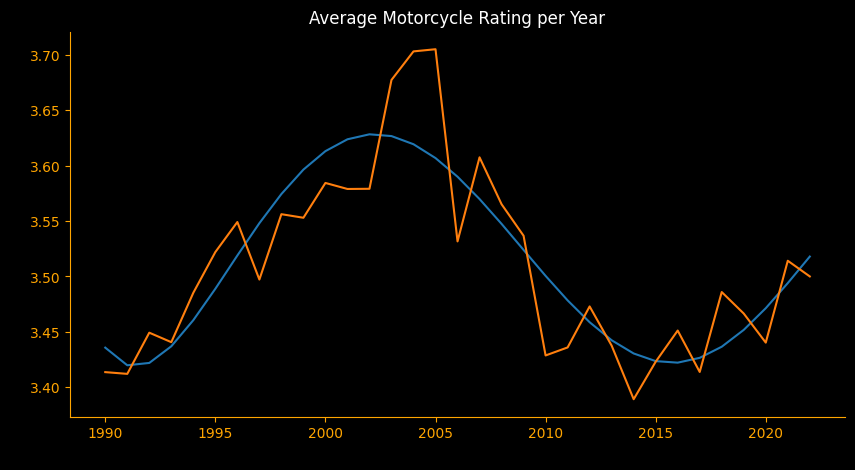

In [9]:
plt.title("Average Motorcycle Rating per Year")
plt.xlabel("Year")
plt.ylabel("Average Rating")

plt.plot(x_year, p_year(x_year))
plt.plot(x_year, y_year)

This is interesting because of just how much it peaks right in the middle there.
It seems people think that bikes were at their greatest right around 2005 and then have quite a sharp decline.
The blue trend line also generally helps to visualise the overall graph.

The avergae rating is pretty low before 1995 which makes sense since those bikes werent nearly as advanced or fast. What's most surpiusing is in the middle. Maybe most of these higher ratings are due to the average demographic on the site doing the ratings are older and are more nostalgic for this era of bikes?
This also may have been around the time where bikes really picked up on power but didnt have all the safety features and tech to limit the fun?


### Motorcyle Category


Before I mentioned a bikes use case and its designed purpose. These can be called bike categories and these include sport, ATV, scooter and more.

you know the deal, gonna check out the categories and how well they're rated.


In [10]:
categories = fd_data["Category"]
cat_mean_rating = [rating[(category == categories)].mean() for category in categories]

x_cat = categories
y_cat = cat_mean_rating

Text(0, 0.5, 'Average Rating')

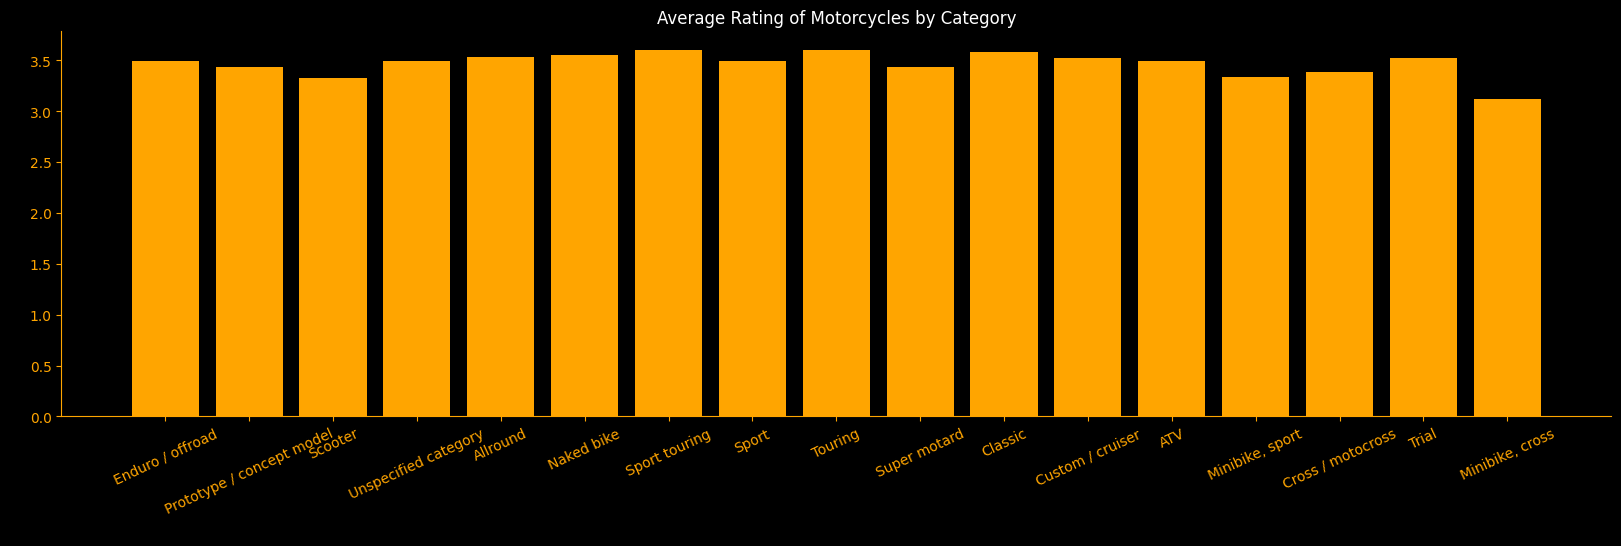

In [11]:
plt.figure(figsize=(20, 5))

plt.bar(x_cat, y_cat, color="orange")

plt.xticks(rotation=25)
plt.title("Average Rating of Motorcycles by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")

OK, so I'm not sure what I was expecting but it looks likes all of the individual categories are pretty highly rated and no single type is overwhelmingly better than any other. Keep in mind that their is a bias towards the very sepcific brands that I has chosen at the beginning and the kinds of bikes that each one makes can be quite limiting, so some categories may be under represented with this graph.


## Investigating Power


Just what it says on the tin, Im gonna look at the average ratings of each level of power and compare them against each other and how muich they influence the score. This will include engine capacity, horse power and torque.


### Engine Size (CC)

The most generalised and most recognisable way to tell how powerful a motorcycle is, is from the size of the engine. Also known as the displacement, the cubic centimetres of a motorcycle tells us how much volume the motorcycle diplaces. The logic follows that the bigger the engine, the more power and torque it'll output. This varies from motorcycle due to tuning, gearing, cylinder count even turbos but it is the easiest number to recognise and its pretty easy to recognise that a 400cc motor is less poerful than a 1000cc motor.


In [12]:
displacement = fd_data["Displacement (ccm)"]
max_disp = displacement.max()
num_groups_disp = 31

group_bound = np.linspace(0, max_disp, num_groups_disp + 1)

# This bit isnt super necessary but it bascially divides the whole range of power values by the num_groups
# then averages the numbers in each group.
# This is to reduce the overall number of values but also to get rid of the weird numbers like 254 and 256
# being right next to each cluttering everything especially different hp right next to each other are
# basically the same.
average_ratings_per_disp = [
    rating[(displacement >= start) & (displacement < end)].mean()
    for start, end in zip(group_bound[:-1], group_bound[1:])
]

x_disp = np.array(group_bound[:-1])
y_disp = np.array(average_ratings_per_disp)

z_disp = np.polyfit(x_disp, y_disp, 4)
p_disp = np.poly1d(z_disp)

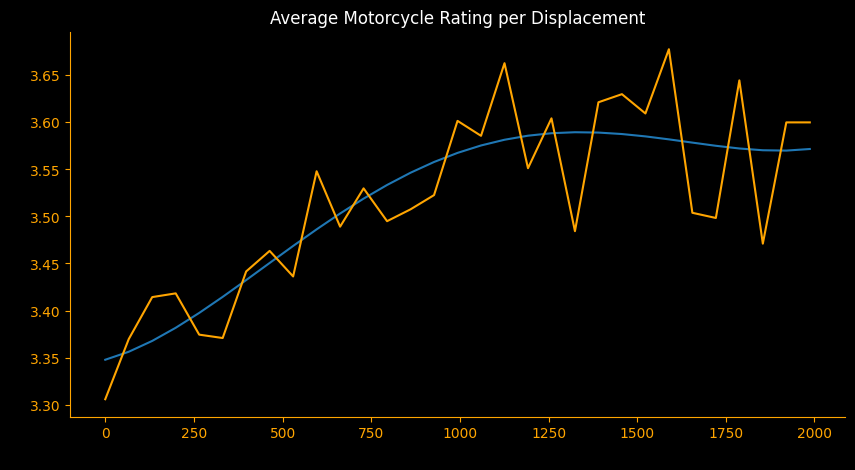

In [13]:
plt.title("Average Motorcycle Rating per Displacement")
plt.xlabel("Displacement (CC)")
plt.ylabel("Average Rating")

plt.plot(x_disp, p_disp(x_disp))
plt.plot(x_disp, y_disp, color="orange")

Its a little tricky to see the overall trend when the plot is all jittery and kind of scattered so I added in the trend line.

With this you can pretty clearly see that the higher the displacement of the engine the higher the rating will generally go. This could be because more power makes the bike more capable as well as more fun?
Manufacturers will also make larger displacement motorcycles the top of the range in both power as well as build quality and technology. This will improve the overall polish of the bike thus the higher rating.


### Power (HP)

Now let's look at the power of each bike and compare it to the ratings as well:


In [14]:
power = fd_data["Power (hp)"]
max_hp = power.max()
num_groups_hp = 40

group_bound = np.linspace(0, max_hp, num_groups_hp + 1)

average_ratings_per_hp = [
    rating[(power >= start) & (power < end)].mean()
    for start, end in zip(group_bound[:-1], group_bound[1:])
]

x_power = group_bound[:-1]
y_power = average_ratings_per_hp

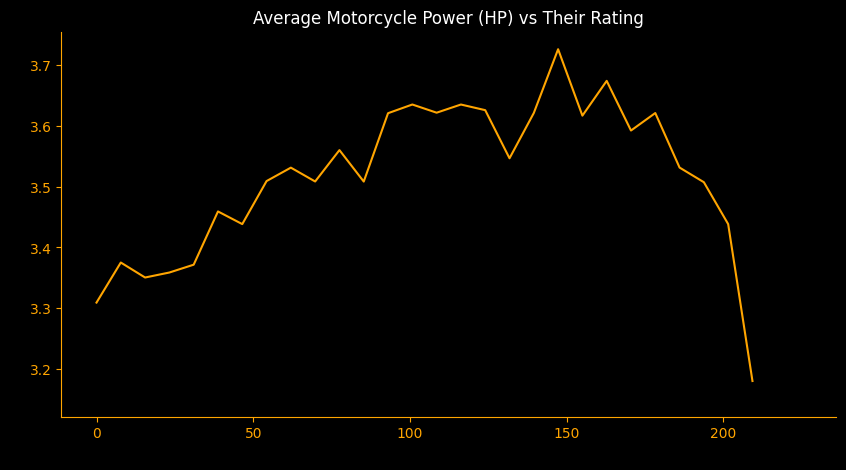

In [15]:
plt.title("Average Motorcycle Power (HP) vs Their Rating")
plt.xlabel("Power (HP)")
plt.ylabel("Average Rating")

plt.plot(x_power, y_power, color="orange")

We see here a steady incline of rating as the horsepower rises which is to be expected. More power means you can go at more ridiculous speeds which is a good thing when you're an adrenaline junkie and most riders are (hence why we ride motorcycles) at least to a point.

We can then see the graph sharply drop off once we go beyond the 175 horse power point most likely becuase after that the motorcycles become too powerful to be concidered safe or even practical for regular use.

Its also interesting to note this when compared to the displacement of the motorcycle that despite capacity increaseing rating, the horse power isnt so straight forward or clean cut. This may be due to the way the rest of the motorcycle is packaged such as the tech and the engine tuning.


### Torque (Nm)

Let's now check out the torwue of each motorcycle using the same method as the power.


In [16]:
torque = fd_data["Torque (Nm)"]
max_torque = power.max()
num_groups = 32

group_bound = np.linspace(0, max_torque, num_groups + 1)

average_ratings_per_hp = [
    rating[(torque >= start) & (torque < end)].mean()
    for start, end in zip(group_bound[:-1], group_bound[1:])
]

x_torque = np.array(group_bound[:-1])
y_torque = np.array(average_ratings_per_hp)

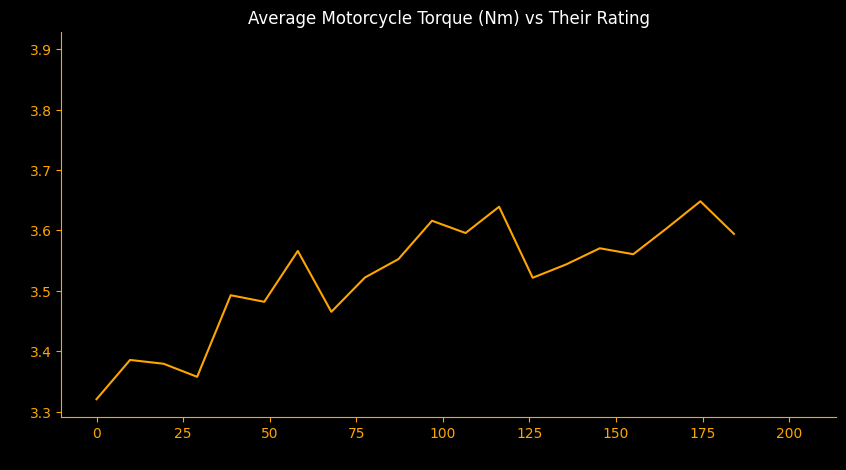

In [17]:
plt.title("Average Motorcycle Torque (Nm) vs Their Rating")
plt.xlabel("Torque (Nm)")
plt.ylabel("Average Rating")

plt.plot(x_torque, y_torque, color="orange")

the torque is pretty straight forward here; the generall trend seems to be the more torque a motorcycle has the higher its rated. The is because the more torque a bike has the harder the motorcycle accelerates. Since no one wants a motorcycle that takes 5 minute4s to get to 100 km/h even if it has 150 hp.

Generally, the more torque a bike has, the more usuable a motorcycle. How much torque can be felt at how many revolutions per minute (rpm) of the motor can vary between motorcycles. The torque that can be feklt at lower rpm the more usuable it is on the street and if most of the torque is felt at higher rpm its generally better for racing bikes where you rev the motorcycle all the way to the limit.

Where you want the torque depends on the motorcycle and if the placement of that torque doesnt work with style and use-case of the bike can majorly influence the usability of the bike in that setting. This can be a major influence over a motorcycles rating.


## Some More Investigation


Here I'm gonna look at some other specifications to see if they have any influence over the rating of the bike. This will include, whether or not they have a carburetor, whether they're liquid cooled, the cylinder count of the motor, fuel capacity and weight.


### Fueling


Basicaly speaking, an engine works by mixing fuel and air together in the combustion chamber and then burning the fuel (combustion). This combustion makes the engine cylinders move and provides power to the rest of the bike.

Fueling refers to the specific way the enging injects fuel into the combustion chamber and there's two main ways most bikes do this.


The first is through carburetors which is an old way of injecting fuel. These were used when motorcycles didnt have fancy electronics, computers and pressurised fuel lines to inject the fuel at specific times. They are typically used on much cheaper or older bikes where the technology is limited either because the tech wasnt mainstream during the bike's production or to reduce the price.

The second most common is fuel injection where, just as the name suggests, the fueling system directly injects the fuel into the combustion chamber instead of by suction like in a carburetor. The timing of the injection is controlled by the bikes computer which controls a pump whioch sends the fuel through the pressurised fuel lines into the combustion chamber.


In [18]:
fueling_type = ["Carburettor", "Injection", "Injection. EFI", "Injection. PGM-FI"]

fueling_type_mean_rating = []

for fueling in fueling_type:
    fueling_type_mean_rating.append(rating[(fd_data["Fuel system"] == fueling)].mean())

x_fueling = fueling_type
y_fueling = fueling_type_mean_rating

Text(0, 0.5, 'Average Rating')

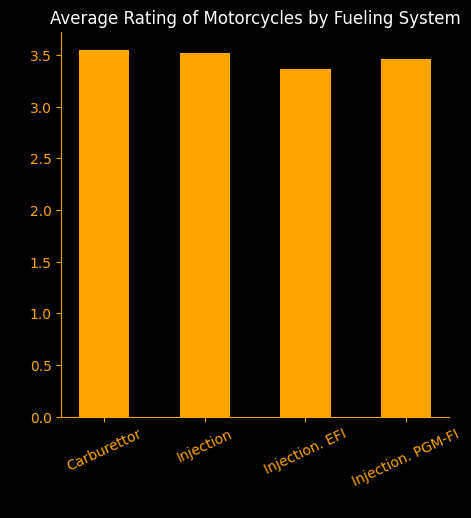

In [19]:
plt.figure(figsize=(5, 5))

plt.bar(x_fueling, y_fueling, color="orange", width=0.5)

plt.xticks(rotation=25)
plt.title("Average Rating of Motorcycles by Fueling System")
plt.xlabel("Fueling System")
plt.ylabel("Average Rating")

The spread of the ratings between each type of fueling system is actualy pretty even. I was expecting carburatior bikes to ranted much lower due to the fact the carburetors adds a factor of difficulty when running these bikes. That because for a carburetors dont work as well when the bike is either cold or has been left idling without running for a while. However this doesnt seem to matter to riders.

This may be because the ease of maintanence and replacability asociated with this kind of fueling system outways the cons. Or maybe the people who dont care about the carburettor are nostalgic for older bikes?


### Cooling


There are 3 main ways to cool a mnotorcycle, air, oil/air and liquid. These cooling systems go from least to most efficient in that order which also coincides with the ease of maintanence and price and the kind of cooling you want depends on the kind of performance, price range and ease of maintanence that you want from a motorcycle.


In [20]:
cooling = ["Air", "Liquid", "Oil & air"]

cooling_mean_rating = [rating[(i == fd_data["Cooling system"])].mean() for i in cooling]

x_cool = cooling
y_cool = cooling_mean_rating

Text(0, 0.5, 'Average Rating')

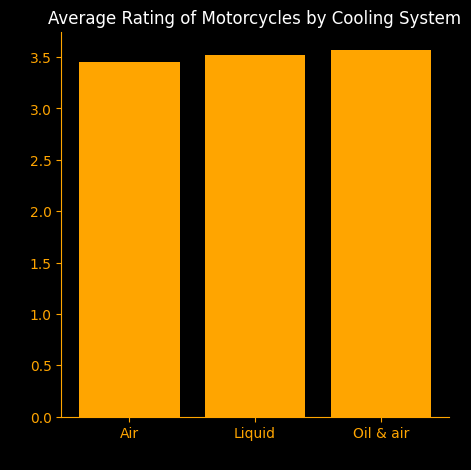

In [21]:
plt.figure(figsize=(5, 5))

plt.bar(x_cool, y_cool, color="orange")

plt.title("Average Rating of Motorcycles by Cooling System")
plt.xlabel("Cooling System")
plt.ylabel("Average Rating")

Again, seems like these the kind of cooling doesnt really matter to most riders despite the performance differences.


### Cylinder Number


There are several advantages and disadvantages that comes with increaseing and decreasing the number of cylinders namely, being able to achieve more revolutions per minute (rpm or revs) achiving more power with less vibration. However more cylinders means are more complex engine and thus higher cost and maintanence.


In [22]:
cylinder = fd_data["Engine cylinder"]

cylinder_mean_rating = [rating[(i == cylinder)].mean() for i in cylinder]

x_cylinder = [str(i) for i in cylinder]
y_cylinder = cylinder_mean_rating

Text(0, 0.5, 'Average Rating')

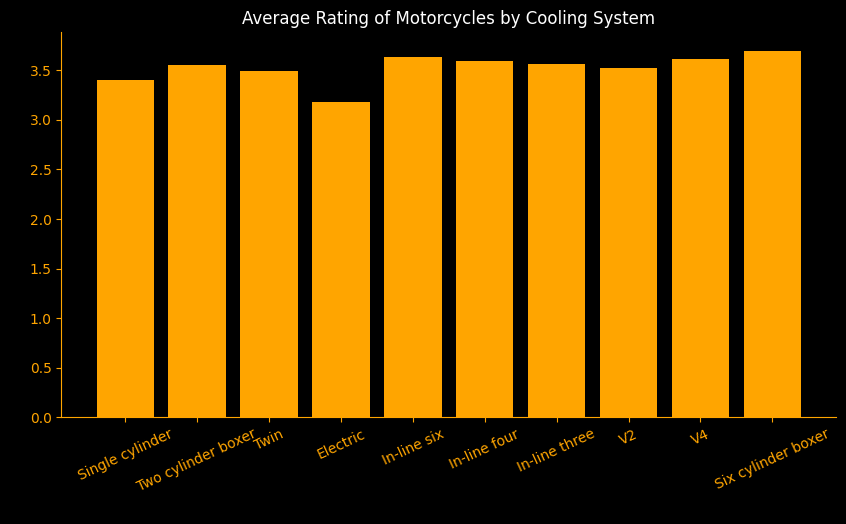

In [23]:
plt.bar(x_cylinder, y_cylinder, color="orange")

plt.xticks(rotation=25)
plt.title("Average Rating of Motorcycles by Cooling System")
plt.xlabel("Cooling System")
plt.ylabel("Average Rating")

Alomst unsurprisingly at this point. The cylinder count doesn't really have that much of a bearing over the ratings nor the configuration.

However electirc motorcyles seem to be rated lower than the rest. This could be because electric motorcyels are realtively nbew to the market and those kinds of bikes as well as they're technology is, as of now, unrefined.


### Fuel Capacity


Super staright forward, just hoe much fuel in litres the bike can hold. The more fuel it can hold, the further it has to go before it has to refil (unless itsnt very fuelk efficient).


In [24]:
fcapacity = fd_data["Fuel capacity (lts)"]
max_fcapacity = fcapacity.max()
num_groups = 43

group_bound = np.linspace(0, max_fcapacity, num_groups + 1)

average_ratings_per_lt = [
    rating[(fcapacity >= start) & (fcapacity < end)].mean()
    for start, end in zip(group_bound[:-1], group_bound[1:])
]

x_fcapacity = group_bound[:-1]
y_fcapacity = average_ratings_per_lt

Text(0, 0.5, 'Average Rating')

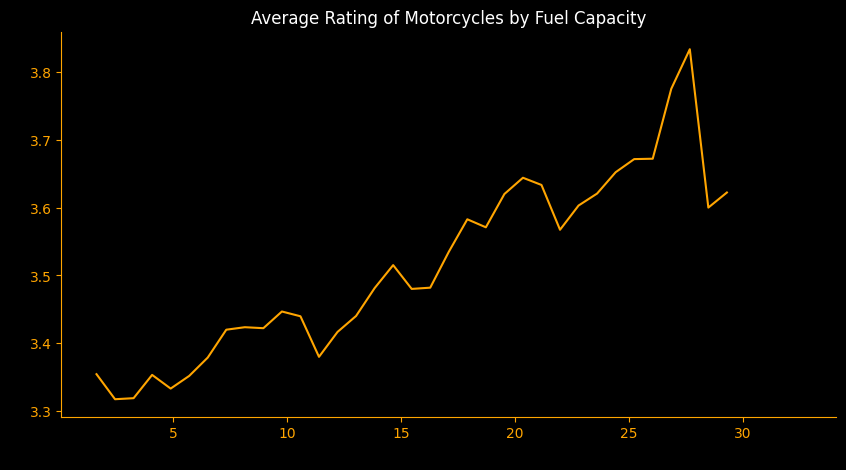

In [25]:
plt.plot(x_fcapacity, y_fcapacity, color="orange")

plt.title("Average Rating of Motorcycles by Fuel Capacity")
plt.xlabel("Fuel Capacity")
plt.ylabel("Average Rating")

This makes sense since the more fuel a bike has the more practical it is, you dont want to be at the petrol station every second day just becuase you took a trip into the city and back. It does seem to taper off at the end so perhaps the added fuel adds to the weight to a large degree that ot makes the bike more unruly.

Its also important to concider the kind of motorcycle and the fuel capacity that you want from it depedning ion te use case. big cruisers and adventure bikes made to put down long miles between stretches of towns where access to fuel might be an issue would require a much higher fuel capacity than a smaller bike only made to pot around city limits. Faster race bikes also need more capacity simply because they burn fuel at a much faster weight but need to keep weuight down; so just enough fuel to last a lap but not enough to make it feel like a beluga whale while doing it./


### Dry Weight


Speaking of weight, dry weight refers to the weight of the motorcycle in kilograms, as in the weight of just the motorcyle wothout things like fuel, oil and coolant which all adds weight. In general terms the bigger the motorcycle engine's is the more it weighs but other factors contribute like frame weight, materials used, added accessories like saddle bags etc. Take for example a 1500 cc super bike is going to be much later than a 1500 cc harley davidson because one is performance and speed focused whilst the other is a highway cruiser.


In [26]:
weight = fd_data["Dry weight (kg)"]
max_weight = weight.max()
num_groups_kg = 24

group_bound = np.linspace(0, max_weight, num_groups_kg + 1)

average_ratings_per_kg = [
    rating[(weight >= start) & (weight < end)].mean()
    for start, end in zip(group_bound[:-1], group_bound[1:])
]

x_weight = group_bound[:-1]
y_weight = average_ratings_per_kg

z_weight = np.polyfit(x_weight, y_weight, 4)
p_weight = np.poly1d(z_weight)

Text(0, 0.5, 'Average Rating')

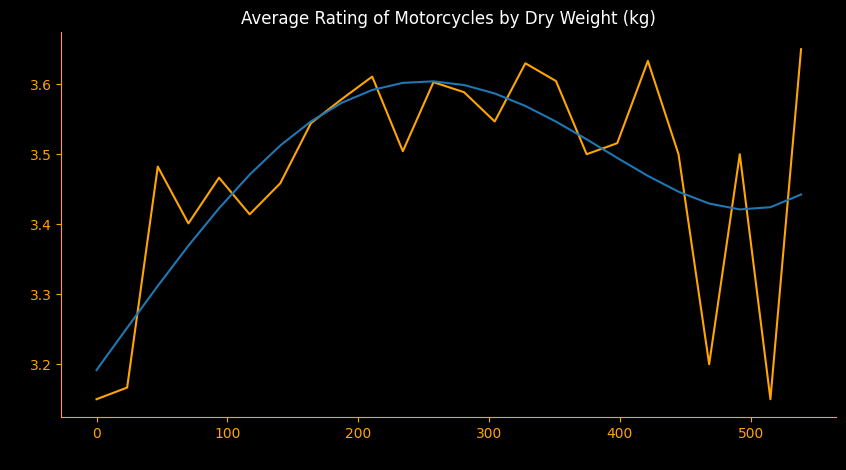

In [27]:
plt.plot(
    x_weight,
    y_weight,
    color="orange",
)
plt.plot(x_weight, p_weight(x_weight))

plt.title("Average Rating of Motorcycles by Dry Weight (kg)")
plt.xlabel("Dry Weight (kg)")
plt.ylabel("Average Rating")

Evidently there's a band of about 150 kg to 450 kg where ratings are the highest with the seet spot being about 250 kg, either siode of that is generaly lower rated. That middle band of could be becuase thats about the region where maunfacturs use more premium materials to create larger capacity bikes whilst also still being light enough to have at least well-rounded performance. Too light and perhaps you're looking at cheap, small capacity whilst much heavier bikes on the other end would be reaching the limit of usability.

The more extreme points particularly seen after the 450 kg mark might be due to other factors or could be concidered general outliers.


## Conclusions


There really arent any amazing or ground breaking revelations to be had from this data.as to be expected with specs like displacement and power folow the goldy locks rules apply and all things should be in moderation. However, more torwue is always a good thing it seems but I suspect the placement of that torque and how far up/down the rev range that torque really starts to kick in also matters which is why there may have been deviation. Airing on the side of more fuel capacity doesn't seem to be a bad idea but I believe the limit depends on how heavy you want the motorcycle to be. Weight would be a different story and could just be an indicator of different aspects of the motorcycle like the displacement, power and possibly electronics. Bigger, more powerful bikes with more tech tend to be much heavier than a small capacity bike with simpler motors. These bigger bikes tend to be of higher quality and would generally get higher ratings.


Things like cyclinder count and configuration, fuel injection type and cooling system dont seem to weigh into the ratings very much.

single cylinder being the second lowest rated could be due to majority of single cylinder motors being low in power nand despite their ease of maintanence and simplicity, arent very inspiring or thrlling engines. Electrics also makes sense simply becuase they are still a developing technology that hasnt been given time to catch up to existing industry standards. The other engine types allhave their pros and cons that have their time and place so its not out of place for them to be even.

I was expecting more modern fuel injection systems to be much more popular but the ease of maintanence and nostalgia will always play a role in the enjopyment of a motorcycle. The same thing goes for cooling systems, though not hugely important outside of high performance settings I did expectliquid cooling to be rated higher but instead they are all faily even.


No single genre or category of riding really stood out either which demonstrates the diverse nature of motorcycle riding and how much riders in general value varied choices in the kinds of riding our machines are capable of.

I suppose the mose interesting graph was the very first one we looked at which was the average ratings per year of production of each motorcycle. This could be the most biased of all analises simply because the filtered brands that I chose to analise were all legacy brands with pre established communities of riders. I also dont know what the general age or nationality is of the demographic from which the data was attained from but I assume they are an older population, though this is only speculation. Other than 1995-2005 motorcycles being rated much higher simply because of legacy and nostalgia other factors like rapidly developng power trains porducing much more power during that error than before as well as the belated development of safety features and tech limiters used to stifle that power could also plat a role. Perhaps these legacy companies have become complacent and have stopped innovating and creating truly exciting bikes. Whatever the reason, it seems bikes have had a decline in ratings over the recent years but have recently been picking back up.
